# Hello, _nbpresent_!

In [ ]:
import nbpresent
nbpresent.__version__

# Using Jupyter Notebook for Db2 Administration
&nbsp;&nbsp;&nbsp;&nbsp;Ember Crooks

&nbsp;&nbsp;&nbsp;&nbsp;XTIVIA

&nbsp;&nbsp;&nbsp;&nbsp;Session Code: F17

&nbsp;&nbsp;&nbsp;&nbsp;Thursday, 5th of October 09:40-10:40

## Setting up this Jupyter Notebook

This notebook should be launched from a session of jupyter notebook that was launched from a DB2 command window
To do this, run an administrator DB2 command window as an administrator and type 'jupyter notebook'

## Jupyter Notebook

### What is Jupyter Notebook?
- Open-source web application that allows you to create and share documents that contain live code, equations, visualizations, and explanatory text.
- Heavily used in Data Science
- Supports a large number of programming languages, including SQL
- Requires Python
- Easiest to install by [installing Anaconda](https://www.continuum.io/downloads)

### Jupyter Notebook Terms
- **Application**
    - Server-client application that allows editing and running notebook document via web browser
    - Can run on a local laptop/desktop or a remote server
- **Kernel**
    - Computational engine that execute the code contained in the notebook
    - ipython kernel executes python – kernels for other languages exist
    - Each running notebook has a different instnace of a Kernel
- **Notebook Dashboard**
    - Shown in browser when you launch Jupyter Notebook
    - Features similar to a file manager
    - Used to open notebooks and manage the running kernels

### More Jupyter Notebook Terms
- **Notebook document or notebooks**
    - Produced by the Jupyter Notebook App
    - Contains both computer code and rich text elements
- **Cell**
    - Portion of a notebook that is either markdown-formatted text or code
    - Each cell can be independently executed in any order, but convention dictates they be executed in order
- **Magic**
    - Called with a command line style syntax
    - Magic Functions work at the cell or line level

### Installing Jupyter Notebook on Windows
- [Download Anaconda](https://www.continuum.io/downloads)
- Install Anaconda, accepting the defaults
- Install at least a DB2 Client
- Download and install [visual studio tools](http://landinghub.visualstudio.com/visual-cpp-build-tools)

- Jupyter Notebook is likely to be installed on a DB2 client such as your laptop or a jump server

### Launching Jupyter Notebook on Windows
- Launch Jupyter Notebook from a DB2 Command Window PowerShell window with the Db2 environment variables set
- Cd to directory where Jupyter Notebooks are stored, first
![screenshot](files/LaunchJupyterNotebook.jpg)

### Jupyter Notebook Basics
[Basics of Jupyter Notebook](BasicsOfJupyterNotebook.ipynb)

### Setting up Jupyter Notebook for use with SQL Magic

#### Install Packages

In [ ]:
import sys,os,os.path
os.environ['DB2INSTANCE']

In [ ]:
## This cell only needs to be executed if these packages have not been previously installed
#Uncomment the below line and set to the proper value if installing these for the first time
#os.environ['IBM_DB_HOME']='C:\Program Files\IBM\SQLLIB_01'
!pip install ipython-sql
!pip install ibm_db 
!pip install ibm_db_sa

Restart the Kernel if this is your first time installing the above. The next steps will fail unless you do this.

#### Import the modules and load SQL magic

In [1]:
## This cell must be executed any time the Kernel is started or restarted
%run db2.ipynb

DB2 Extensions Loaded.


#### Connect to the database. 
- Change the values of user, host, and password to match your environment. 
- For connection to a local database, use 'localhost' for the host name. 
- Also change the port number and database name in the connection string.
- Minimally, the password is stored in a separate file for easier sharing

In [2]:
user='db2admin'
host='localhost'
# Define filename for passwords
filename = 'ember_variables.py'
# source the file
%run $filename
password = LocalDB2password

%sql CONNECT TO SAMPLE USER $user USING ? HOST $host PORT 50000

Password [password]: ········
Connection successful.


Explicitly closing connections is not currently possible

### Using SQL in Jupyter Notebook 
- SQL magic makes SQL quick and easy
- DB2 commands can be executed when the notebook was launched from a command window, when prefixed with !
- Limited options available in sql magic - full ibm_db offers more options using Python or the core language of your choice

### Jupyter Notebook and SQL Magic Topics
- How does commit processing work by default and how can you change it?
- Using SQL magic for whole cell vs. line by line
- Displaying data in interesting ways
- Using host variables/parameter markers
- Explains

### Jupyter Notebook and Commit Processing
- Autocommit is on
- More advanced controls available through traditonal python syntax for the ibm_db driver

In [3]:
%sql drop table temp_sales
%sql create table temp_sales like ember.sales

Command completed.
Command completed.


In [4]:
%sql insert into temp_sales select * from ember.sales

Command completed.


In [5]:
%sql select count(*) from temp_sales

,1
0,41


In [6]:
%sql insert into temp_sales select * from ember.sales
%sql rollback
%sql select count(*) from temp_sales

Command completed.
Command completed.


,1
0,82


In [7]:
%sql update command options using c OFF

### Using SQL Magic at the Cell Level vs. the Line Level
- Line Level
    - Each line is prefixed with %
    - If a command fails, subsequent lines are still executed
- Cell Level
    - Using SQL Magic at the cell level involves starting a Cell with %%sql
    - All lines in the cell are then interpreted as SQL
    - If a command fails, subsequent lines are not executed

In [8]:
%%sql
--sql magic at the cell level
select * from syscat.tables;
select * from dual;
select * from syscat.bufferpools;

,TABSCHEMA,TABNAME,OWNER,OWNERTYPE,TYPE,STATUS,BASE_TABSCHEMA,BASE_TABNAME,ROWTYPESCHEMA,ROWTYPENAME,...,ONCOMMIT,LOGGED,ONROLLBACK,LASTUSED,CONTROL,TEMPORALTYPE,TABLEORG,EXTENDED_ROW_SIZE,PCTEXTENDEDROWS,REMARKS
0,SYSIBM,SYSTABLES,SYSIBM,S,T,N,None,None,None,None,...,,,,2017-10-02,,N,R,N,-1.0,None
1,SYSIBM,SYSCOLUMNS,SYSIBM,S,T,N,None,None,None,None,...,,,,2017-10-03,,N,R,N,-1.0,None
2,SYSIBM,SYSINDEXES,SYSIBM,S,T,N,None,None,None,None,...,,,,2017-10-02,,N,R,N,-1.0,None
3,SYSIBM,SYSVIEWS,SYSIBM,S,T,N,None,None,None,None,...,,,,0001-01-01,,N,R,N,-1.0,None
4,SYSIBM,SYSVIEWDEP,SYSIBM,S,T,N,None,None,None,None,...,,,,2017-09-30,,N,R,N,-1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,SYSTOOLS,ADVISE_WORKLOAD,DB2ADMIN,U,T,N,None,None,None,None,...,,,,0001-01-01,,N,R,N,-1.0,None
707,SYSTOOLS,ADVISE_MQT,DB2ADMIN,U,T,N,None,None,None,None,...,,,,0001-01-01,,N,R,N,-1.0,None
708,SYSTOOLS,ADVISE_PARTITION,DB2ADMIN,U,T,N,None,None,None,None,...,,,,0001-01-01,,N,R,N,-1.0,None
709,SYSTOOLS,ADVISE_TABLE,DB2ADMIN,U,T,N,None,None,None,None,...,,,,0001-01-01,,N,R,N,-1.0,None


In [9]:
#sql magic at the line level
%sql select * from syscat.tables;
%sql select * from dual;
%sql select * from syscat.bufferpools;

,BPNAME,BUFFERPOOLID,DBPGNAME,NPAGES,PAGESIZE,ESTORE,NUMBLOCKPAGES,BLOCKSIZE,NGNAME
0,IBMDEFAULTBP,1,None,250,8192,N,0,0,None


### Displaying Data in Interesting Ways

In [10]:
#Import stuff we need
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
import pandas as pd

# All plots should be inline, inside the notebook
%matplotlib inline

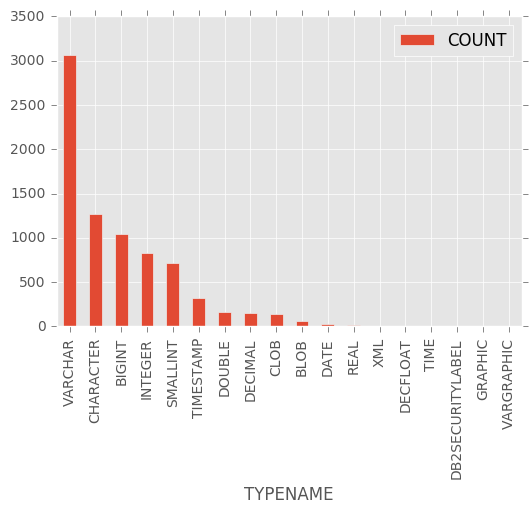

In [4]:
%sql -pb select typename \
    , count(*) as count \
from syscat.columns \
group by typename \
order by count desc

In [12]:
%sql WITH SUM_TAB (SUM_RR, SUM_CPU, SUM_EXEC, SUM_SORT, SUM_NUM_EXEC) AS ( \
        SELECT  nullif(FLOAT(SUM(ROWS_READ)),0), \
                nullif(FLOAT(SUM(TOTAL_CPU_TIME)),0), \
                nullif(FLOAT(SUM(STMT_EXEC_TIME)),0), \
                nullif(FLOAT(SUM(TOTAL_SECTION_SORT_TIME)),0), \
                nullif(FLOAT(SUM(NUM_EXECUTIONS)),0) \
            FROM TABLE(MON_GET_PKG_CACHE_STMT ( 'D', NULL, NULL, -2)) AS T \
        ) \
SELECT \
        ROWS_READ, \
        DECIMAL(100*(FLOAT(ROWS_READ)/SUM_TAB.SUM_RR),5,2) AS PCT_TOT_RR, \
        TOTAL_CPU_TIME, \
        DECIMAL(100*(FLOAT(TOTAL_CPU_TIME)/SUM_TAB.SUM_CPU),5,2) AS PCT_TOT_CPU, \
        STMT_EXEC_TIME, \
        DECIMAL(100*(FLOAT(STMT_EXEC_TIME)/SUM_TAB.SUM_EXEC),5,2) AS PCT_TOT_EXEC, \
        TOTAL_SECTION_SORT_TIME, \
        DECIMAL(100*(FLOAT(TOTAL_SECTION_SORT_TIME)/SUM_TAB.SUM_SORT),5,2) AS PCT_TOT_SRT, \
        NUM_EXECUTIONS, \
        DECIMAL(100*(FLOAT(NUM_EXECUTIONS)/SUM_TAB.SUM_NUM_EXEC),5,2) AS PCT_TOT_EXEC, \
        DECIMAL(FLOAT(STMT_EXEC_TIME)/FLOAT(NUM_EXECUTIONS),10,2) AS AVG_EXEC_TIME, \
        RTRIM(STMT_TEXT) as STATEMENT \
    FROM TABLE(MON_GET_PKG_CACHE_STMT ( 'D', NULL, NULL, -2)) AS T, SUM_TAB \
    WHERE DECIMAL(100*(FLOAT(ROWS_READ)/SUM_TAB.SUM_RR),5,2) > 10 \
        OR DECIMAL(100*(FLOAT(TOTAL_CPU_TIME)/SUM_TAB.SUM_CPU),5,2) >10 \
        OR DECIMAL(100*(FLOAT(STMT_EXEC_TIME)/SUM_TAB.SUM_EXEC),5,2) >10 \
        OR DECIMAL(100*(FLOAT(TOTAL_SECTION_SORT_TIME)/SUM_TAB.SUM_SORT),5,2) >10 \
        OR DECIMAL(100*(FLOAT(NUM_EXECUTIONS)/SUM_TAB.SUM_NUM_EXEC),5,2) >10 \
    ORDER BY ROWS_READ DESC FETCH FIRST 20 ROWS ONLY WITH UR

,ROWS_READ,PCT_TOT_RR,TOTAL_CPU_TIME,PCT_TOT_CPU,STMT_EXEC_TIME,PCT_TOT_EXEC,TOTAL_SECTION_SORT_TIME,PCT_TOT_SRT,NUM_EXECUTIONS,PCT_TOT_EXEC,AVG_EXEC_TIME,STATEMENT
0,1422,81.11,15625,14.28,28,3.87,0,None,2,7.14,14.00,select * from syscat.tables
1,190,10.83,31250,28.57,268,37.06,0,None,1,3.57,268.00,drop table temp_sales
2,74,4.22,46875,42.85,124,17.15,0,None,4,14.28,31.00,"CALL SYSPROC.SYSINSTALLOBJECTS('POLICY','V',''..."
3,26,1.48,15625,14.28,281,38.86,0,None,1,3.57,281.00,create table temp_sales like ember.sales
4,20,1.14,0,0.00,2,0.27,0,None,4,14.28,0.50,"SELECT COLNAME, TYPENAME FROM SYSCAT.COLUMNS ..."
5,16,0.91,0,0.00,3,0.41,0,None,4,14.28,0.75,SELECT TRIGNAME FROM SYSCAT.TRIGGERS WHERE TA...
6,0,0.00,0,0.00,0,0.00,0,None,6,21.42,0.00,SET CURRENT LOCK TIMEOUT 5


In [13]:
df= %sql WITH SUM_TAB (SUM_RR, SUM_CPU, SUM_EXEC, SUM_SORT, SUM_NUM_EXEC) AS ( \
        SELECT  nullif(FLOAT(SUM(ROWS_READ)),0), \
                nullif(FLOAT(SUM(TOTAL_CPU_TIME)),0), \
                nullif(FLOAT(SUM(STMT_EXEC_TIME)),0), \
                nullif(FLOAT(SUM(TOTAL_SECTION_SORT_TIME)),0), \
                nullif(FLOAT(SUM(NUM_EXECUTIONS)),0) \
            FROM TABLE(MON_GET_PKG_CACHE_STMT ( 'D', NULL, NULL, -2)) AS T \
        ) \
SELECT substr(stmt_text,1,25) as STATEMENT, \
        ROWS_READ, \
        coalesce(DECIMAL(100*(FLOAT(ROWS_READ)/SUM_TAB.SUM_RR),5,2),0) AS PCT_TOT_RR, \
        TOTAL_CPU_TIME, \
        coalesce(DECIMAL(100*(FLOAT(TOTAL_CPU_TIME)/SUM_TAB.SUM_CPU),5,2),0) AS PCT_TOT_CPU, \
        STMT_EXEC_TIME, \
        coalesce(DECIMAL(100*(FLOAT(STMT_EXEC_TIME)/SUM_TAB.SUM_EXEC),5,2),0) AS PCT_TOT_EXEC, \
        TOTAL_SECTION_SORT_TIME, \
        coalesce(DECIMAL(100*(FLOAT(TOTAL_SECTION_SORT_TIME)/SUM_TAB.SUM_SORT),5,2),0) AS PCT_TOT_SRT, \
        NUM_EXECUTIONS, \
        coalesce(DECIMAL(100*(FLOAT(NUM_EXECUTIONS)/SUM_TAB.SUM_NUM_EXEC),5,2),0) AS PCT_TOT_EXECS, \
        DECIMAL(FLOAT(STMT_EXEC_TIME)/FLOAT(NUM_EXECUTIONS),10,2) AS AVG_EXEC_TIME, \
        RTRIM(STMT_TEXT) as FULL_STATEMENT \
    FROM TABLE(MON_GET_PKG_CACHE_STMT ( 'D', NULL, NULL, -2)) AS T, SUM_TAB \
    WHERE DECIMAL(100*(FLOAT(ROWS_READ)/SUM_TAB.SUM_RR),5,2) > 10 \
        OR DECIMAL(100*(FLOAT(TOTAL_CPU_TIME)/SUM_TAB.SUM_CPU),5,2) >10 \
        OR DECIMAL(100*(FLOAT(STMT_EXEC_TIME)/SUM_TAB.SUM_EXEC),5,2) >10 \
        OR DECIMAL(100*(FLOAT(TOTAL_SECTION_SORT_TIME)/SUM_TAB.SUM_SORT),5,2) >10 \
        OR DECIMAL(100*(FLOAT(NUM_EXECUTIONS)/SUM_TAB.SUM_NUM_EXEC),5,2) >10 \
    ORDER BY ROWS_READ DESC FETCH FIRST 20 ROWS ONLY WITH UR
%matplotlib inline
df.describe()

,ROWS_READ,PCT_TOT_RR,TOTAL_CPU_TIME,PCT_TOT_CPU,STMT_EXEC_TIME,PCT_TOT_EXEC,TOTAL_SECTION_SORT_TIME,PCT_TOT_SRT,NUM_EXECUTIONS,PCT_TOT_EXECS,AVG_EXEC_TIME
count,4.000000,4.00000,4.00,4.0,4.000000,4.000000,4.0,4.0,4.000000,4.000000,4.000000
mean,356.000000,24.94500,3906.25,25.0,10.750000,21.937500,0.0,0.0,2.750000,18.330000,7.000000
std,710.667292,49.79671,7812.50,50.0,12.841988,26.207195,0.0,0.0,2.217356,14.784877,7.527727
min,0.000000,0.00000,0.00,0.0,0.000000,0.000000,0.0,0.0,1.000000,6.660000,0.000000
25%,0.000000,0.00000,0.00,0.0,1.500000,3.060000,0.0,0.0,1.750000,11.662500,0.750000
50%,1.000000,0.07000,0.00,0.0,7.500000,15.305000,0.0,0.0,2.000000,13.330000,7.000000
75%,357.000000,25.01500,3906.25,25.0,16.750000,34.182500,0.0,0.0,3.000000,19.997500,13.250000
max,1422.000000,99.64000,15625.00,100.0,28.000000,57.140000,0.0,0.0,6.000000,40.000000,14.000000


Show number of rows and number of columns of the output

In [14]:
df.shape

(4, 13)

Show the names of all columns, in a comma separated list

In [15]:
df.columns

Index(['STATEMENT', 'ROWS_READ', 'PCT_TOT_RR', 'TOTAL_CPU_TIME', 'PCT_TOT_CPU',
       'STMT_EXEC_TIME', 'PCT_TOT_EXEC', 'TOTAL_SECTION_SORT_TIME',
       'PCT_TOT_SRT', 'NUM_EXECUTIONS', 'PCT_TOT_EXECS', 'AVG_EXEC_TIME',
       'FULL_STATEMENT'],
      dtype='object')

Sort the output by a different column

In [16]:
# sort output by a different column (be sure to use correct case)
df.sort_values(by=['STMT_EXEC_TIME'], ascending=False)

,STATEMENT,ROWS_READ,PCT_TOT_RR,TOTAL_CPU_TIME,PCT_TOT_CPU,STMT_EXEC_TIME,PCT_TOT_EXEC,TOTAL_SECTION_SORT_TIME,PCT_TOT_SRT,NUM_EXECUTIONS,PCT_TOT_EXECS,AVG_EXEC_TIME,FULL_STATEMENT
0,select * from syscat.tabl,1422,99.64,15625,100.0,28,57.14,0,0.0,2,13.33,14.0,select * from syscat.tables
2,"select typename , cou",0,0.00,0,0.0,13,26.53,0,0.0,1,6.66,13.0,"select typename , count(*) as count from s..."
1,SELECT POLICY FROM SYSTOO,2,0.14,0,0.0,2,4.08,0,0.0,2,13.33,1.0,SELECT POLICY FROM SYSTOOLS.POLICY WHERE MED='...
3,SET CURRENT LOCK TIMEOUT,0,0.00,0,0.0,0,0.00,0,0.0,6,40.00,0.0,SET CURRENT LOCK TIMEOUT 5


Plot the data on multiple dimensions

<function matplotlib.pyplot.show>

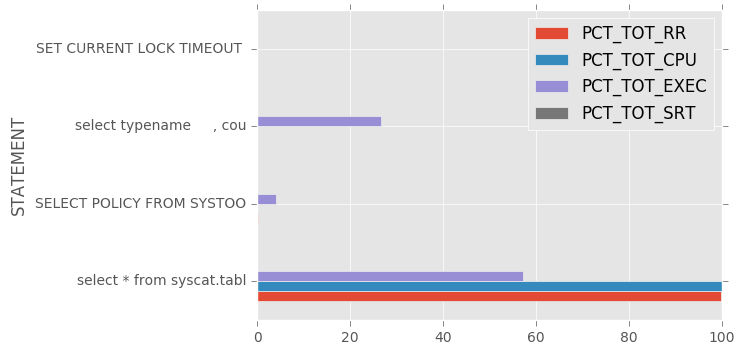

In [17]:
df.plot(x='STATEMENT', y=['PCT_TOT_RR','PCT_TOT_CPU','PCT_TOT_EXEC','PCT_TOT_SRT'], kind='barh')
plt.show

In [18]:
pandas.set_option('display.max_colwidth', -1)
df[['FULL_STATEMENT']]

,FULL_STATEMENT
0,select * from syscat.tables
1,SELECT POLICY FROM SYSTOOLS.POLICY WHERE MED='DB2CommonMED' AND DECISION='NOP' AND NAME='CommonPolicy'
2,"select typename , count(*) as count from syscat.columns group by typename order by count desc"
3,SET CURRENT LOCK TIMEOUT 5


### Using Host Variables / Parameter Markers

This statement is prepared using the literal value

In [ ]:
check_id = 'DB2ADMIN'
%sql select tabschema \
    , tabname \
    , controlauth \
    , deleteauth \
    , insertauth \
    , selectauth \
    , updateauth \
from syscat.tabauth \
where grantee = '{check_id}'

This statement is prepared using a parameter marker

In [ ]:
#Ask George about this one
check_id = 'DB2ADMIN'
%sql select tabschema \
    , tabname \
    , controlauth \
    , deleteauth \
    , insertauth \
    , selectauth \
    , updateauth \
from syscat.tabauth \
where grantee = :check_id

### Explain Information in Jupyter Notebook

#### If Explain Tables do not Exist, Create Them

In [ ]:
# This cell only needs to be executed if the explain tables do not exist
%sql call sysproc.sysinstallobjects('EXPLAIN','C',NULL,NULL)

In [19]:
%sql set current explain mode explain
# Below will return CLI0115E, but that is expected and it works fine.
%sql select bpname from syscat.bufferpools

Command completed.


In [20]:
%sql set current explain mode no

Command completed.


In [21]:
!db2exfmt -d SAMPLE -1 -o query_exfmt.txt

Connecting to the Database.


DB2 Universal Database Version 11.1, 5622-044 (c) Copyright IBM Corp. 1991, 2015
Licensed Material - Program Property of IBM
IBM DATABASE 2 Explain Table Format Tool

Connect to Database Successful.
Using SYSTOOLS schema for Explain tables.
Output is in query_exfmt.txt.
Executing Connect Reset -- Connect Reset was Successful.


In [22]:
with open("query_exfmt.txt") as f:
    for line in f:
        if line.rstrip() == "Access Plan:":
            print("")
            for line in f:
                if line.rstrip() == "Extended Diagnostic Information:":
                    break
                print(line.rstrip())


-----------
	Total Cost: 		0.0034452
	Query Degree:		1


       Rows
      RETURN
      (   1)
       Cost
        I/O
        |
         1
      IXSCAN
      (   2)
     0.0034452
         0
        |
         1
  INDEX: SYSIBM
 INDBUFFERPOOLS01
        Q1



